In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
db1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/olist_order_items_dataset.csv",sep=",")
db2=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/olist_orders_dataset.csv",sep=",")
db3=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/input/olist_products_dataset.csv",sep=",")

In [ ]:
db1=db1.iloc[:,[0,1,2]]

In [ ]:
db1.head()

,order_id,order_item_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089


In [ ]:
db2=db2.iloc[:,[0,3]]
db2.head()

,order_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [ ]:
db3=db3.iloc[:,[0,1]]
db3.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [ ]:
merged_Frame = pd.merge(db1,db3, on = 'product_id',how='inner')

In [ ]:
merged_Frame

,order_id,order_item_id,product_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,esporte_lazer


In [ ]:
fdb= pd.merge(merged_Frame,db2, on = 'order_id',how='inner')

In [ ]:
fdb

,order_id,order_item_id,product_id,product_category_name,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-09-13 08:59:02
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-06-28 11:52:20
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2018-05-18 10:25:53
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-08-01 18:38:42
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-08-10 21:48:40
...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim,2018-07-13 20:04:05
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao,2018-08-18 10:00:59
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes,2017-06-01 16:53:03
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,2017-12-18 16:33:07


In [ ]:
final_db=fdb
final_db.dtypes

order_id                    object
order_item_id                int64
product_id                  object
product_category_name       object
order_purchase_timestamp    object
dtype: object

In [ ]:
import time
final_db.order_purchase_timestamp = final_db.order_purchase_timestamp.astype("datetime64[s]")

In [ ]:
final_db.dtypes

order_id                            object
order_item_id                        int64
product_id                          object
product_category_name               object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [ ]:
final_db.head()

,order_id,order_item_id,product_id,product_category_name,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-09-13 08:59:02
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-06-28 11:52:20
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2018-05-18 10:25:53
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-08-01 18:38:42
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,2017-08-10 21:48:40


#Exploratory

In [ ]:
product_num=final_db.groupby('product_id')['order_item_id'].sum()
product_num=pd.DataFrame(product_num)
product_num.reset_index(level=0, inplace=True)
product_num

,product_id,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


In [ ]:
top_10=product_num.sort_values(by='order_item_id', ascending=False).head(10)
top_10

,product_id,order_item_id
8613,422879e10f46682990de24d770e7f83d,793
22112,aca2eb7d00ea1a7b8ebd4e68314663af,640
7079,368c6c730842d78016ad823897a372db,551
10840,53759a2ecddad2bb87a079a1f1519f73,545
19742,99a4788cb24856965c36a24e339b6058,542
7364,389d119b48cf3043d311335e499d9c6b,534
27039,d1c427060a0f73f6b889a5c7c61f2ac4,369
21302,a62e25e09e05e6faf31d90c6ec1aa3d1,367
10867,53b36df67ebb7c41585e8d54d6772e08,359
8051,3dd2a17168ec895c781a9191c1e95ad7,306


In [ ]:
final_db1=final_db[final_db['product_id'].isin(top_10.product_id)]
final_db1=final_db1.sort_values(by='order_purchase_timestamp', ascending=True)
final_db1=final_db1.reset_index(drop=True)
final_db1

,order_id,order_item_id,product_id,product_category_name,order_purchase_timestamp
0,f1b3dc829876d87a130808b76d5bacf7,1,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2017-02-15 16:31:44
1,f89780d4d98317847142affbe5c0c965,1,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2017-02-21 09:31:18
2,af9c840cca8fc0cb05a2f9e9ec923fa6,1,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2017-02-23 15:07:15
3,5fd7343c3fa3940bd6fb6145c38382ff,1,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,2017-02-28 11:11:32
4,bd23f37e365507db2b5b5b624b413315,1,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,2017-02-28 18:50:42
...,...,...,...,...,...
3813,4d5cefeb0501de96acd522c3742d3d04,2,53759a2ecddad2bb87a079a1f1519f73,ferramentas_jardim,2018-08-22 15:14:14
3814,4d5cefeb0501de96acd522c3742d3d04,1,53759a2ecddad2bb87a079a1f1519f73,ferramentas_jardim,2018-08-22 15:14:14
3815,feafc8e3422f6e1f4c00bd29dd9c2921,1,53759a2ecddad2bb87a079a1f1519f73,ferramentas_jardim,2018-08-22 16:31:45
3816,f8687dbf5b2eb77e1a9ed2d9ab104901,1,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2018-08-22 18:27:48


In [ ]:
beta=top_10.product_id.unique()

In [ ]:
for i in range(0,10):
  globals()['final'+str(i)]= final_db1[final_db1['product_id'] == beta[i]]

In [ ]:
final0

,order_id,order_item_id,product_id,product_category_name,order_purchase_timestamp
77,af8e7d8a37a728552281a38e79f5e82a,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2017-05-02 18:34:59
104,1f3c0a87c88ece858b2f766ae1952dc2,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2017-05-13 15:27:06
108,dae83470e95e9cf80cf6bcb0fa345777,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2017-05-14 20:20:55
140,7a727e7d4fd27ecc265e8415030811c5,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2017-05-29 21:39:18
177,4d7e10ed70b8c2358e94850352bb490b,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2017-06-15 20:23:00
...,...,...,...,...,...
3770,78e669f43077eded2d55ba9455560995,3,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2018-08-05 15:42:51
3771,2e6e6de992c5567f41aa94497d505e77,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2018-08-06 02:58:06
3772,2e6e6de992c5567f41aa94497d505e77,2,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2018-08-06 02:58:06
3799,9bdc00acb04f677adc8329b932122fd6,1,422879e10f46682990de24d770e7f83d,ferramentas_jardim,2018-08-13 15:34:27


In [ ]:
final0['order_purchase_timestamp'] = pd.to_datetime(final0['order_purchase_timestamp']) - pd.to_timedelta(7, unit='d')
final0 = final0.filter(['order_purchase_timestamp', 'order_item_id']).groupby([pd.Grouper(key='order_purchase_timestamp', freq='W-MON')]).sum().reset_index()

In [ ]:
final0

,order_purchase_timestamp,order_item_id
0,2017-04-24,0
1,2017-05-01,1
2,2017-05-08,0
3,2017-05-15,0
4,2017-05-22,1
...,...,...
61,2018-06-25,1
62,2018-07-02,2
63,2018-07-09,8
64,2018-07-16,1


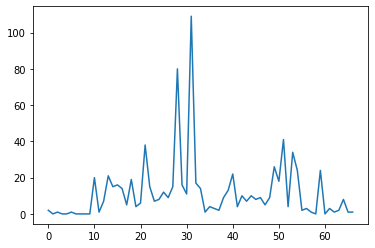

In [ ]:
final0.order_item_id.plot(x='order_purchase_timestamp')
plt.show()

Model1

In [ ]:
#model1
df=final0

In [ ]:
df['shift_sale'] = df['order_item_id'].shift(1)
df = final0.iloc[1:]

In [ ]:
def four_week_avg(sales):
    sum = 0
    week_avg = []    
    for i in range(3, -1, -1):
        for j in range(i):
            sum += sales[j]
        if(i!=0):
            week_avg.append(sum/i)
        sum = 0
    week_avg.append(sales[0])
    week_avg.reverse()    
    for row in range(len(sales) - 4):
        for row in range(row, row + 4):
            sum += sales[row]
        week_avg.append(sum / 4)
        sum = 0
    return week_avg

In [ ]:
df['week_avg'] = four_week_avg(df['order_item_id'].tolist())
print(df.head())

  order_purchase_timestamp  order_item_id  shift_sale  week_avg
1               2017-05-08              1         0.0  1.000000
2               2017-05-15              0         1.0  1.000000
3               2017-05-22              0         0.0  0.500000
4               2017-05-29              1         0.0  0.333333
5               2017-06-05              0         1.0  0.500000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Model

Data split

In [ ]:
test = df.iloc[-10:]
df=df.iloc[:-10]

In [ ]:
X = train.drop(['order_purchase_timestamp','order_item_id'], axis=1)
y = train['order_item_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = svm.SVR(C=1, kernel='linear', degree=8, gamma='scale', coef0=10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(f'Model fit results:\n'
      f'r2_score {r2_score(y_test, predictions)} \t MSE {mean_squared_error(y_test, predictions)}'
      f'\tEVS {explained_variance_score(y_test, predictions)} \n MAE {mean_absolute_error(y_test, predictions)}'
      f'\tMAD {median_absolute_error(y_test, predictions)}\t ME {max_error(y_test, predictions)}')

Model fit results:
r2_score 0.011385018961844406 	 MSE 828.4318925827233	EVS 0.05056833100183966 
 MAE 13.562424268399779	MAD 6.036786196329803	 ME 96.69685352934192


In [ ]:
predictions = clf.predict(test.drop(['order_purchase_timestamp','order_item_id'], axis=1))
print(f'Model test results:\n'
      f'r2_score {r2_score(test["order_item_id"], predictions)} \t MSE {mean_squared_error(test["order_item_id"], predictions)}'
      f'\tEVS {explained_variance_score(test["order_item_id"], predictions)} \n MAE {mean_absolute_error(test["order_item_id"], predictions)}'
      f'\tMAD {median_absolute_error(test["order_item_id"], predictions)}\t ME {max_error(test["order_item_id"], predictions)}')

Model test results:
r2_score -0.43605087782764307 	 MSE 70.20852741699346	EVS -0.1352470396320664 
 MAE 7.426010231551244	MAD 6.863205827147229	 ME 17.03349221753336


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
 
# — Instantiate a Decision Tree Regressor 
tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=5) 
 
# — Fit the tree to the training data 
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#Decision tree regressor

In [ ]:
X = train.drop(['order_purchase_timestamp','order_item_id'], axis=1)
y = train['order_item_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a prediction based on our model 
Y_train_pred = tree.predict(X_train) 
 
# Compute the Mean Absolute Error of the model 
import numpy as np
MAE_tree = np.mean(abs(y_train - Y_train_pred))/np.mean(y_train) 
 
# Print the results 
print("Tree on train set MAE%:",round(MAE_tree*100,1))

Tree on train set MAE%: 58.1


In [ ]:
predictions = tree.predict(X_test)
print(f'Model fit results:\n'
      f'r2_score {r2_score(y_test, predictions)} \t MSE {mean_squared_error(y_test, predictions)}'
      f'\tEVS {explained_variance_score(y_test, predictions)} \n MAE {mean_absolute_error(y_test, predictions)}'
      f'\tMAD {median_absolute_error(y_test, predictions)}\t ME {max_error(y_test, predictions)}')

Model fit results:
r2_score 0.008292739577349995 	 MSE 831.02313681028	EVS 0.012405086364663753 
 MAE 15.638888888888888	MAD 10.242857142857142	 ME 93.4


#ARIMA

In [ ]:
final0=final0.set_index('order_purchase_timestamp')

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(final0.order_item_id,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:584.6910367366625
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:485.142490369849
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:504.75312400464856
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:379.28365720022833
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:492.4365300575253
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:481.7835773452252
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:400.00465733234074
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:381.0616815382185
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:570.5894419815017


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:474.083276309751
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:497.297371429081
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:372.69216761536677
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:490.5057619555943


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:475.5224753746959
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:401.6096297422178


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:374.6662258155981
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:587.7817228982244
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:489.1016409057883
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:525.1145701737054
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:393.3159828134257
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.4626407650983
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:491.0871196515832


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/

ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:415.4053729236375


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:395.3002680389554
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:547.538304543323
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:453.60702856421574
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:490.40986927410836


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:365.4390418630287
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:469.54489063840305
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:455.6056817142882


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:394.79795596845383


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:368.5660567901322
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:575.0064724508728
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:480.111032145831
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:505.88385810701186
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:380.6645275858828


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:479.9665662828814
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:481.9659672612171
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:393.1399812800927


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:382.6454404955613
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:556.8622139960372


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:461.62222129287767
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:497.3452438914456


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:372.5595372290819
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:469.9372163414162


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:461.97795165727354


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:393.57257852655596


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:373.7087101032963
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:572.163726538537
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:476.60612693525314
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:513.1455376333098


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:384.97722886543545
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:476.6893265994971
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:478.60424954610903
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:397.4618654002419


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:386.96151545865706
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:549.5060355077458
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:455.5977889556007
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:492.3303543380657


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:367.33806411705706
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:463.4705308321779


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:457.59524885280285
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:387.7145089031356


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:369.01350493025063


In [ ]:
mod = sm.tsa.statespace.SARIMAX(final0,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8190      0.154     -5.311      0.000      -1.121      -0.517
ma.S.L12      -1.0000      0.160     -6.245      0.000      -1.314      -0.686
sigma2       438.3431      0.000    1.2e+06      0.000     438.342     438.344


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


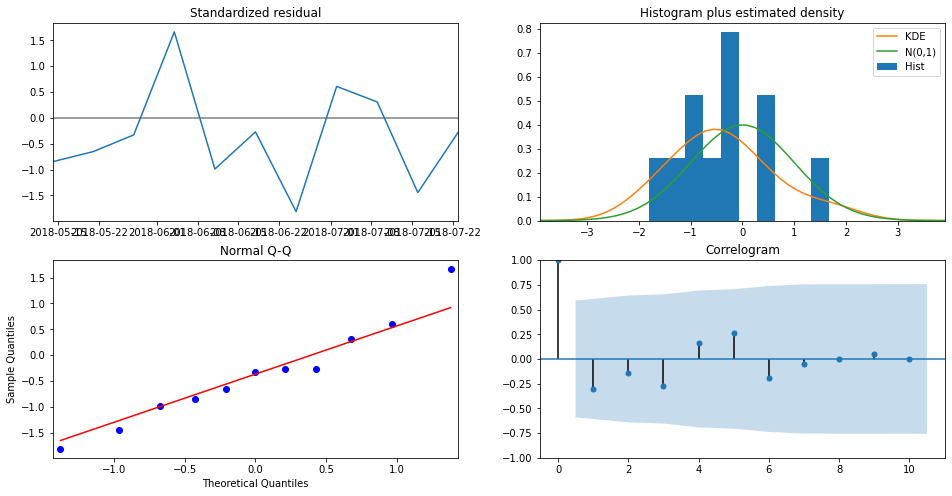

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
final0.tail(15)

,order_item_id
order_purchase_timestamp,
2018-04-16,4
2018-04-23,34
2018-04-30,24
2018-05-07,2
2018-05-14,3
2018-05-21,1
2018-05-28,0
2018-06-04,24
2018-06-11,0


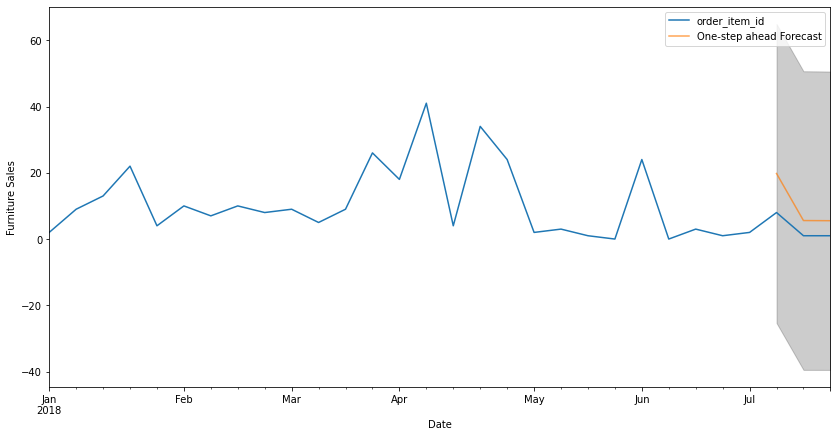

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-07-09'), dynamic=False)
pred_ci = pred.conf_int()
ax = final0['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pd.DataFrame(pred.predicted_mean)
y_truth = pd.DataFrame(final0['2018-07-09':])

In [ ]:
y_forecasted.columns= ['order_item_id']

In [ ]:
print(y_forecasted)
print(y_truth)

            order_item_id
2018-07-09      19.787449
2018-07-16       5.582118
2018-07-23       5.533816
                          order_item_id
order_purchase_timestamp               
2018-07-09                            8
2018-07-16                            1
2018-07-23                            1


In [ ]:
y_forecasted.subtract(y_truth)

,order_item_id
2018-07-09,11.787449
2018-07-16,4.582118
2018-07-23,4.533816


In [ ]:
mse = ((y_forecasted.subtract(y_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}\n'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is order_item_id    60.17
dtype: float64



In [ ]:
rmse=mse**0.5
rmse

order_item_id    7.756615
dtype: float64

In [ ]:
final0.mean()

order_item_id    11.969697
dtype: float64